In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms

In [ ]:
class VGGnet(nn.Module):
    
    def __init__(self):

        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(1,64,3,1,padding=1),
            nn.ReLU(True),
            #nn.Conv2d(64,64,3,1,1),
            #nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,1,padding=1),
            nn.ReLU(inplace = True),
            #nn.Conv2d(128,128,3,1,1),
            #nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,2,1,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256,256,3,1,padding=1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512,3,1,padding=1),
            nn.ReLU(inplace = True),
            nn.Conv2d(512,512,3,1,padding=1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2,2),
        )
        """self.conv1 = nn.Conv2d(3,64,3,1,1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(64,128,3,1,1)
        self.conv3 = nn.Conv2d(128,256,3,1,1)
        self.conv4 = nn.Conv2d(256,256,3,1,1)
        self.conv5 = nn.Conv2d(256,256,3,1,1)
        self.conv6 = nn.Conv2d(256,256,3,1,1)
        self.conv7 = nn.Conv2d(256,512,3,1,1)
        self.conv8 = nn.Conv2d(512,512,3,1,1)

        self.dropout = nn.Dropout(inplace = True)
        self.ln1 = nn.Linear(in_features=512*2*2, out_features=512)
        self.ln2 = nn.Linear(in_features=512, out_features=128)
        self.ln3 = nn.Linear(in_features=128, out_features=10)
        """    
        
        self.classifier = nn.Sequential(
            #nn.Dropout(inplace=True),
            nn.Linear(in_features=512*2*2, out_features=128),
            nn.ReLU(inplace = True),
            #nn.Dropout(inplace=True),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(inplace = True),
            #nn.Dropout(inplace=True),
            nn.Linear(in_features=64, out_features=10),
        )


    def forward(self,x):
        """x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool(self.relu(self.conv4(x)))
        x = self.relu(self.conv5(x))
        x = self.maxpool(self.relu(self.conv6(x)))
        
        print(x.size())
        x = torch.flatten(x,1)

        x = self.relu(self.ln1(x))
        x = self.relu(self.ln2(x))
        x = self.ln3(x)
        """

        x = self.net(x)
        #print(x.size())
        x = torch.flatten(x,1)
        x = self.classifier(x)

        return x

'''
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        self.net = nn.Sequential(
            nn.Conv2d(3,64,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(64,64,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(128,128,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(256,256,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(512,512,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
        )

        self.classifier = nn.Sequential(
            #nn.Dropout(True),
            #nn.Dropout(True),
            nn.Linear(512*2*2, 512),
            nn.ReLU(True),
            #nn.Dropout(True),
            #nn.Dropout(True),
            nn.Linear(512,128),
            nn.ReLU(True),
            #nn.Dropout(True),
            #nn.Dropout(True),
            nn.Linear(128,10),
        )

    def forward(self, x):
        x = self.net(x)
        #print(x.size())
        x = torch.flatten(x,1)
        x = self.classifier(x)
        return x
'''
    
net = VGGnet()
    


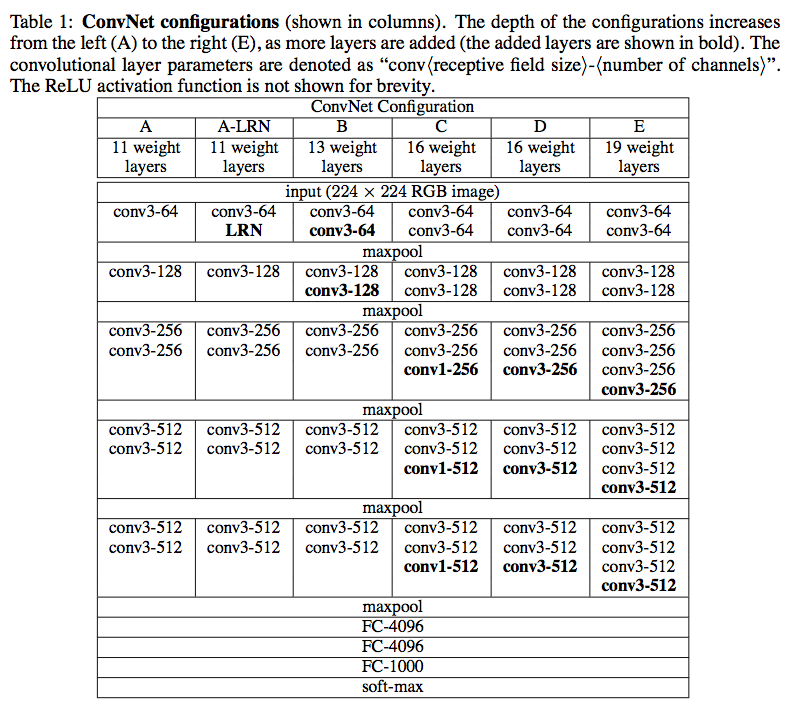

In [ ]:
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize((0.5),(0.5))]
)

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    

len(trainloader)

938

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9, weight_decay= 0.0005)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
net.to(device)

VGGnet(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )

In [ ]:
x = 0
#torch.autograd.set_detect_anomaly(True)
for epoch in range(25):

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        print(inputs.size())
        outputs = net(inputs)
        #print(outputs.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #print(optimizer)

        running_loss += loss.item()

        if(i%50 == 49):
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    if x%5 == 0:
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                # calculate outputs by running images through the network 
                outputs = net(images)
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        print('Accuracy of the network %d : 0.2f %%' % (x,
            100 * correct / total))
        x = 0
    
    x += 1


print("Finished Tranining")



torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

KeyboardInterrupt: ignored

In [ ]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.3f' % (
    100 * correct / total))